# 10. `pandas`和`seaborn`：統計圖表繪製

xarray雖然可以輕易地開啟netCDF檔，繪製多種地圖，但目前沒有內建的統計圖表繪圖函數如盒鬚圖 (box plot)、散佈圖 (scatter plot) 等。`seaborn`是強大的統計資料視覺化工具，可以利用簡明的語言和高階功能的引數，繪製專業又美觀的統計圖表。由於氣候資料的解讀很仰賴統計方法，因此學習利用如何將氣候統計的結果，送進 `seaborn`的函數中繪圖，是很重要的。

`seaborn`可以接受的資料格式主要為.csv資料檔，以及 `pandas.DataFrame`，寫入資料時必須寫成 `seaborn` 能辨識之 **「長表格 (long form)」** 和 **「寬表格 (wide form)」** ，有關表格的說明詳見[`seaborn`網頁的說明](https://seaborn.pydata.org/tutorial/data_structure.html)。本單元的重點在於如何建立正確的`pandas.DataFrame`格式並且送進`seaborn`的畫圖函數，有關繪圖的方法、引數等，[官方教學](https://seaborn.pydata.org/)已經有清楚的說明，此處不再一一介紹。

![](https://seaborn.pydata.org/_images/data_structure_19_0.png)

## `pandas`的資料架構

按照資料的維度，`pandas`的資料結構分為Series和DataFrame兩種。和xarray類似，pandas資料帶有網格資訊 (或稱為標籤 labels)。

### Series

Series是一維、標籤化的陣列，可以儲存多元的變數種類。而座標軸或標籤稱為index。建立Series的方法如下：

~~~
s = pd.Series(data, index=index)
~~~

只要給定資料和座標軸標籤，就可以建立Series。以下提供一個範例，更多詳細的用法請參考[Pandas官網](https://pandas.pydata.org/docs/user_guide/dsintro.html#dataframe)。

In [1]:
import numpy as np 
import pandas as pd 

s = pd.Series(np.random.randn(5), index=["a", "b", "c", "d", "e"])
s

a    1.452861
b    2.144297
c    0.715775
d   -2.096562
e   -1.251507
dtype: float64

### DataFrame

DataFrame就是二維標籤化的資料陣列，可以想像成一個Excel的活頁簿表格。建立的方法如下

~~~
s = pd.DataFrame(data, index=index, column=None)
~~~

index可以想像成列的標籤，column是欄的標籤。

In [2]:
d = np.random.randn(5,3)
df = pd.DataFrame(d, index=['a','b','c','d','e'], columns=['one','two','three'])
df

,one,two,three
a,0.611851,0.698779,-0.643209
b,0.500200,0.050716,0.642934
c,-1.057555,0.302989,1.449692
d,0.678972,-1.418596,-1.621314
e,0.346697,0.118802,0.745335


也可以利用 **字典 (Dictionary)**，而字典的key就會被當作欄的標籤。

In [3]:
df = pd.DataFrame(dict(bom=np.random.randn(10),
                       cma=np.random.randn(10),
                       ecmwf=np.random.randn(10),
                       ncep=np.random.randn(10)), 
                  index=range(1998,2008)
                  )
df

,bom,cma,ecmwf,ncep
1998,0.837317,0.572209,0.480067,1.222619
1999,0.919354,1.732992,2.094890,-0.575223
2000,-0.351232,-1.657264,-0.305590,0.215067
2001,0.721230,1.922182,-1.056933,-0.894096
2002,-0.245303,-0.886180,0.284485,1.246321
2003,0.819041,0.927039,0.362323,-0.079939
2004,1.214038,1.305797,-0.693067,1.813123
2005,0.291181,-0.262313,1.018601,-0.487274
2006,0.047997,-0.512837,0.345604,-0.468011
2007,-0.064661,-0.302389,-0.715783,0.013501


## 利用`pandas`讀取`.csv`檔案

利用`pandas.read_csv()`，就可以將.csv檔案轉換成 `pandas.DataFrame`。

**Example 1:** `sns_sample_s2s_pr_rmse.csv`檔案中有BoM、CMA的S2S模式在前15個預報時 (lead time)，事後預報 (1998-2013) 某區域冬季季內高峰降雨事件的PR值的誤差 (PR_RMSE) 。(見[Tsai et al. (2021, Atmosphere)](https://www.mdpi.com/2073-4433/12/6/758))

In [4]:
import pandas as pd

df = pd.read_csv("data/sns_sample_s2s_pr_rmse.csv")
df.head()

,Models,Lead time (days),Year,PR_RMSE
0,BoM,1.0,1998.0,21.78
1,BoM,1.0,1999.0,36.98
2,BoM,1.0,2000.0,7.25
3,BoM,1.0,2001.0,13.18
4,BoM,1.0,2002.0,19.64


## `pandas.DataFrame`與`seaborn`的Long Form繪圖

只要將資料按照long form/wide form的需求排列好，就可以很輕易地將資料繪圖。以上的.csv檔案就是屬於Long form的形式。

**Example 1:** 將`sns_sample_s2s_pr_rmse.csv`檔案繪圖，繪製x軸為預報時(Lead time)，縱軸是預報PR_RMSE，利用盒鬚圖表示多年PR_RMSE的分布。

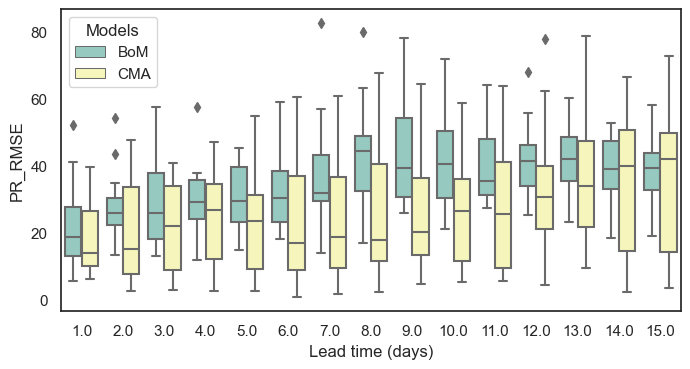

In [5]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

mpl.rcParams['figure.dpi'] = 100

sns.set_theme(style="white", palette=None)
fig, ax = plt.subplots(figsize=(8,4)) 
bxplt = sns.boxplot(data=df,
                    x='Lead time (days)', y='PR_RMSE', 
                    ax=ax,
                    hue='Models',
                    palette="Set3")
ax.set_ylabel("PR_RMSE")
plt.show()

也可以用Facet Grid，將兩個模式分為兩張圖畫。用Facet Grid繪製盒鬚圖要用`catplot()`這個函數。

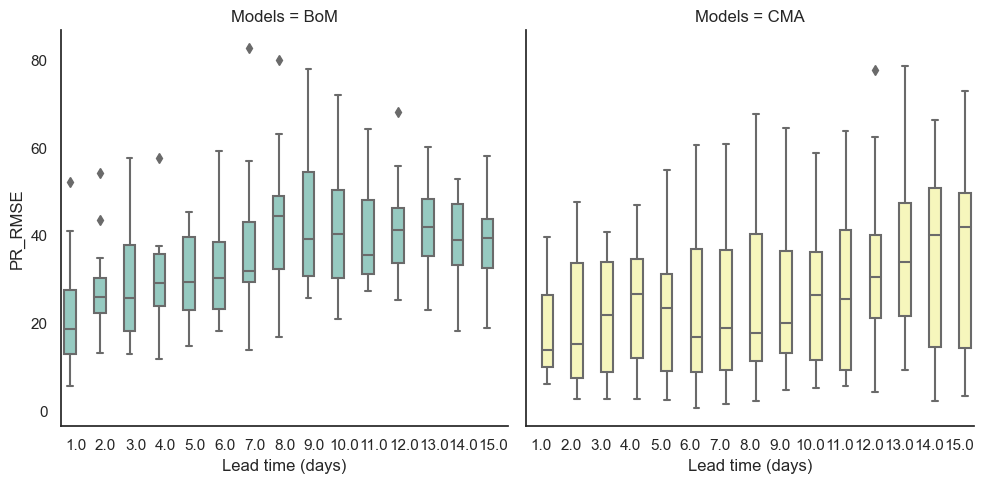

In [6]:
sns.set_theme(style="white", palette=None)
bxplt = sns.catplot(data=df,
                    x='Lead time (days)', y='PR_RMSE', 
                    kind='box', col='Models',
                    hue='Models',
                    palette="Set3")
ax.set_ylabel("PR_RMSE")
plt.show()

## 繪製散布圖 (scatter plot) 以及回歸分析

**Example 2:** 將夏季(五至七月)候平均副高指標和長江流域(105.5˚-122˚E, 27˚-33.5˚N)降雨資料在散布圖上，並且計算回歸線。副高指數定義為

$$\mathrm{WPSH} = U_{850}\left[ (115˚-140˚\mathrm{E}, 28˚-30˚\mathrm{N})\right] − U_{850}\left[(115˚-140˚\mathrm{E}, 15˚-17˚\mathrm{N})\right]$$

**Step 1:** 讀取風場和降雨資料檔案。

In [7]:
import xarray as xr
pcpds = xr.open_dataset('data/cmorph_sample.nc')
pcp = (pcpds.sel(time=slice('1998-01-01','2018-12-31'),
                  lat=slice(27,33.5),
                  lon=slice(105.5,122)).cmorph)
pcp

<xarray.DataArray 'cmorph' (time: 7670, lat: 12, lon: 66)>
[6074640 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1998-01-01 1998-01-02 ... 2018-12-31
  * lon      (lon) float32 105.6 105.9 106.1 106.4 ... 121.1 121.4 121.6 121.9
  * lat      (lat) float32 27.12 27.38 27.62 27.88 ... 29.12 29.38 29.62 29.88
Attributes:
    standard_name:  lwe_precipitation_rate
    long_name:      NOAA Climate Data Record (CDR) of CPC Morphing Technique ...
    units:          mm/day
    comment:        !!! CMORPH estimate is rainrate !!!

In [8]:
uds = xr.open_mfdataset( 'data/ncep_r2_uv850/u850.*.nc',                                       
                          combine = "nested",               
                          concat_dim='time',                               
                          parallel=True                
                         )
u = uds.sel(time=slice('1998-01-01','2018-12-31'),
            level=850,
            lat=slice(30,15),
            lon=slice(115,140)).uwnd
u

<xarray.DataArray 'uwnd' (time: 7670, lat: 7, lon: 11)>
dask.array<getitem, shape=(7670, 7, 11), dtype=float32, chunksize=(366, 7, 11), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1998-01-01 1998-01-02 ... 2018-12-31
  * lon      (lon) float32 115.0 117.5 120.0 122.5 ... 132.5 135.0 137.5 140.0
  * lat      (lat) float32 30.0 27.5 25.0 22.5 20.0 17.5 15.0
    level    float32 850.0
Attributes:
    standard_name:         eastward_wind
    long_name:             Daily U-wind on Pressure Levels
    units:                 m/s
    unpacked_valid_range:  [-140.  175.]
    actual_range:          [-78.96 110.35]
    precision:             2
    GRIB_id:               33
    GRIB_name:             UGRD
    var_desc:              u-wind
    dataset:               NCEP/DOE AMIP-II Reanalysis (Reanalysis-2) Daily A...
    level_desc:            Pressure Levels
    statistic:             Mean
    parent_stat:           Individual Obs
    cell_methods:          time: mean (of 4 6-hourly values in one day)

**Step 2:** 計算候降雨區域平均和副高指標，並且取出所需要的季節。

In [9]:
pcpts = (pcp.mean(axis=(1,2))
            .sel(time=~((pcp.time.dt.month == 2) & (pcp.time.dt.day == 29)))
            )
pcp_ptd = pcpts.coarsen(time=5,side='left', coord_func={"time": "min"}).mean()  # 計算pentad mean
pcp_ptd_mjj = pcp_ptd.sel(time=(pcp_ptd.time.dt.month.isin([5,6,7])))
pcp_ptd_mjj

<xarray.DataArray 'cmorph' (time: 399)>
array([ 6.1119447 ,  7.571944  ,  9.226313  ,  1.109394  ,  5.3176517 ,
        2.2713385 ,  4.5563893 ,  5.548586  , 20.215153  , 19.05255   ,
       19.18139   , 11.589319  ,  5.768939  ,  0.8520454 ,  2.0018182 ,
        7.1484594 , 16.180103  , 15.215152  ,  9.107071  ,  2.5040152 ,
        3.840025  ,  6.161818  , 10.612726  , 14.754066  ,  4.777803  ,
        3.7596467 ,  4.2742677 ,  4.1311617 ,  9.817575  ,  9.265707  ,
       19.125706  ,  5.8694196 ,  9.390833  ,  6.653005  , 11.306919  ,
        4.9133587 ,  4.404621  ,  5.623662  ,  0.42189392,  4.163914  ,
        0.89323235,  4.060303  ,  6.1958838 ,  7.9272475 ,  9.796288  ,
       13.937828  ,  7.175     ,  4.0308585 , 17.810404  ,  2.4159596 ,
        8.7743435 ,  5.2782073 ,  0.85707074,  3.5488381 ,  1.2096969 ,
        6.624646  ,  1.9946716 ,  5.699394  ,  8.616186  ,  1.5915152 ,
        4.1929545 ,  2.6942427 ,  3.4918437 , 13.028662  ,  8.653611  ,
        7.7104044 ,  9.239192  ,  6.0609846 ,  4.4448996 ,  3.5450509 ,
        5.1548486 ,  8.582021  ,  2.6875    ,  0.5927273 ,  0.6543434 ,
        6.838661  ,  8.804344  , 10.843763  , 15.854294  ,  4.8490906 ,
        1.5454293 ,  5.111869  ,  2.1185105 ,  5.9939146 ,  8.986516  ,
       11.501137  ,  6.855783  , 19.229874  ,  4.8697224 ,  3.6527023 ,
        0.28075758, 11.871238  , 13.896718  ,  5.5745454 ,  7.2881308 ,
        8.425404  ,  5.2889137 , 12.673864  ,  3.7550251 ,  5.4035106 ,
...
        1.7411363 ,  2.8605304 ,  0.06626263,  3.5106819 ,  9.037273  ,
        9.238309  ,  6.672399  ,  7.323561  , 14.975934  ,  1.794293  ,
       13.95515   ,  2.2613385 ,  0.44108588, 11.281011  , 12.378283  ,
        7.4113646 , 14.560858  ,  1.5172222 , 13.836011  , 10.90058   ,
        4.5382323 ,  4.3567934 ,  2.0662374 ,  4.1724496 ,  9.48851   ,
       16.287956  ,  6.195707  ,  2.3606565 , 11.566339  , 13.658864  ,
        9.880757  , 11.507375  , 10.583131  ,  7.5609345 ,  1.6071465 ,
        9.036112  ,  1.5086616 ,  3.748207  ,  4.2615147 , 11.935782  ,
        4.1128035 ,  0.83159095, 12.750354  , 18.391438  ,  3.9217172 ,
        7.9154043 ,  6.137349  ,  5.678056  , 17.364166  ,  3.0512373 ,
        6.274015  , 20.679419  ,  4.495379  , 14.612981  , 17.417526  ,
        4.1593685 ,  7.485732  , 14.482325  ,  0.45714647,  1.4413131 ,
        5.4458075 ,  3.4082577 ,  6.1348233 , 10.790833  ,  0.6386616 ,
        4.5670204 ,  1.3894949 , 14.749066  ,  8.999117  , 13.643537  ,
        6.38601   , 24.602198  , 17.027979  , 12.688131  ,  4.9872475 ,
        4.0856314 ,  1.6659092 ,  0.5755303 ,  1.7656313 ,  5.5999494 ,
        5.241363  ,  5.9827776 ,  2.3927524 , 12.155732  ,  6.2022223 ,
        7.9329047 ,  3.525303  ,  5.64601   ,  4.1817927 ,  5.8839903 ,
        7.2206063 ,  3.9626517 , 15.497324  ,  9.463485  ,  2.8450253 ,
        0.19522728,  2.8943431 ,  3.5896213 ,  6.607399  ], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1998-05-01 1998-05-06 ... 2018-07-30

In [10]:
ushear =  ( u.sel(lat=slice(30,28)).mean(axis=(1,2)) -
            u.sel(lat=slice(17,15)).mean(axis=(1,2)) )
ushear_ts = ushear.sel(time=~((ushear.time.dt.month == 2) & (ushear.time.dt.day == 29)))

us_ptd = ushear_ts.coarsen(time=5,side='left', coord_func={"time": "min"}).mean()  # 計算pentad mean
us_ptd_mjj = us_ptd.sel(time=(us_ptd.time.dt.month.isin([5,6,7])))
us_ptd_mjj

<xarray.DataArray 'uwnd' (time: 399)>
dask.array<getitem, shape=(399,), dtype=float32, chunksize=(19,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1998-05-01 1998-05-06 ... 2018-07-30
    level    float32 850.0

**Step 3:** 轉換成DataFrame的Long Form形式，並送入`seaborn`繪圖函數繪圖。繪製散布圖以及對應的迴歸線，使用[`seaborn.regplot`](https://seaborn.pydata.org/generated/seaborn.regplot.html#seaborn.regplot)這個函數。

In [11]:
scatter_df = (xr.merge([pcp_ptd_mjj.rename('pcp'), us_ptd_mjj.rename('ushear')])
                .to_dataframe()
                .reset_index())
scatter_df

,time,pcp,level,ushear
0,1998-05-01,6.111945,850.0,10.862909
1,1998-05-06,7.571944,850.0,11.484545
2,1998-05-11,9.226313,850.0,12.718000
3,1998-05-16,1.109394,850.0,7.670909
4,1998-05-21,5.317652,850.0,-9.089272
...,...,...,...,...
394,2018-07-10,2.845025,850.0,-5.535454
395,2018-07-15,0.195227,850.0,-14.066727
396,2018-07-20,2.894343,850.0,-11.340726
397,2018-07-25,3.589621,850.0,-6.049819


Text(1.0, 1.0, '$R=$ 0.316, $p=$ 1.09e-10')

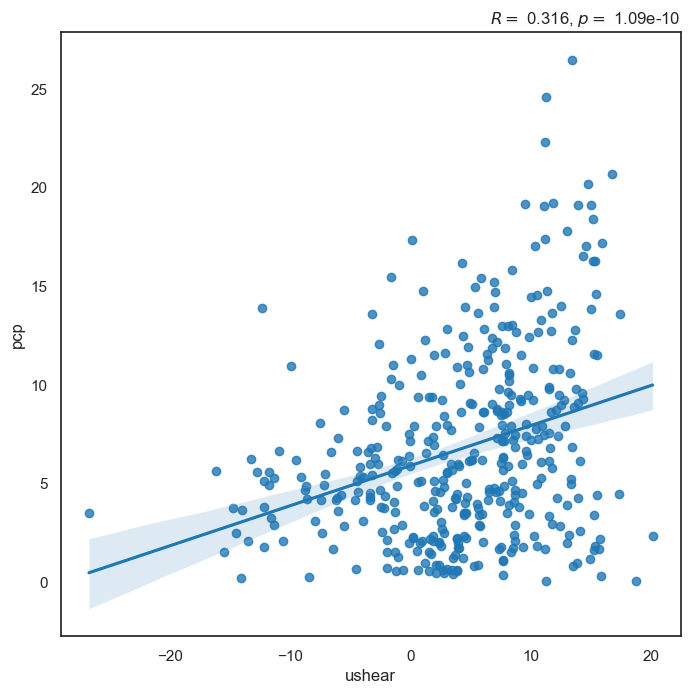

In [12]:
from scipy import stats

def corr(x, y):
    return stats.pearsonr(x, y)[0], stats.pearsonr(x, y)[1]

# 計算相關係數和統計顯著性。
r, p = corr(us_ptd_mjj.values, pcp_ptd_mjj.values)

fig, ax = plt.subplots(figsize=(8,8))
sns.set_theme()
plt = sns.regplot(x="ushear", y="pcp",
                  data=scatter_df,
                  ci=95, ax=ax) # ci是信心水準
ax.set_title(f'$R=$ {r:5.3f}, $p=$ {p:8.2e}', loc='right' )

## 多層次標籤 (Multi-index) 的 DataFrame

**Example 2:** 分析S2S模式在15個預報時 (lead time, `lt=15`) 以及11個系集成員 (ensemble members, `ens=11`)在分為Hindcast、Forecast兩種cases的情形下，某變數`value`的分佈情形。

由於`value`分類的層次較多，所以必須用`pandas.MultiIndex`建立起`(lead_time, number, case)`的索引。

In [13]:
lt = 15 
ens = 4

iterables = [range(1,lt+1), range(1,ens+1), ["Hindcast", "Forecast"]]
tuples = pd.MultiIndex.from_product(iterables, names=["lead_time", "number","case"])  
         # from_product 是將iterables中的標籤相乘，形成各lead time、number、case的組合。
data = pd.DataFrame(data={'value': np.random.randn(lt*ens*2)}, index=tuples)  
       # 先以亂數代表資料。資料取名為'value'。
data.head()

value
lead_time number case              
1         1      Hindcast  1.138915
                 Forecast  1.003731
          2      Hindcast  0.955664
                 Forecast  0.600719
          3      Hindcast  0.720853

我們發現表頭被分為兩行，這是因為在`DataFrame`結構中， `lead_time`、`number`、`case`稱為 **Index**，`value` 稱為 **Column**，如果直接放到`seaborn`函數中，coulmns的名稱是無法使用的。

In [14]:
from matplotlib import pyplot as plt
sns.set_theme(style="white", palette=None)
bxplt = sns.catplot(data=data,
                    x='lead_time', y='value', kind='box', 
                    hue='case', hue_order=['Hindcast','Forecast'],
                    palette=['white','silver'])
ax.set_ylabel("PR_RMSE")
plt.show()

ValueError: Could not interpret input 'lead_time'

要讓這個`DataFrame`變成`seaborn` 可讀取的long form格式，必須加上`data.reset_index()`，就會轉變成理想中的DataFrame了。

In [15]:
data.reset_index()

,lead_time,number,case,value
0,1,1,Hindcast,1.138915
1,1,1,Forecast,1.003731
2,1,2,Hindcast,0.955664
3,1,2,Forecast,0.600719
4,1,3,Hindcast,0.720853
...,...,...,...,...
115,15,2,Forecast,1.057672
116,15,3,Hindcast,-0.260097
117,15,3,Forecast,1.561240
118,15,4,Hindcast,-1.702897


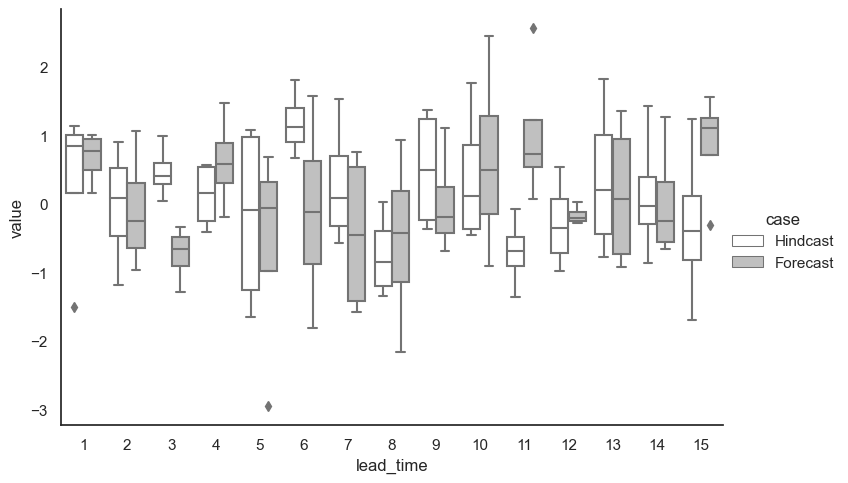

In [16]:
sns.set_theme(style="white", palette=None)
bxplt = sns.catplot(data=data.reset_index(),
                    x='lead_time', y='value', kind='box', 
                    hue='case', hue_order=['Hindcast','Forecast'],
                    palette=['white','silver'],
                    aspect=1.5)
plt.show()

## Wide Form的Seaborn製圖

**Example 3:** 繪製台灣－北南海 (18˚-24˚N, 116˚-126˚E) 區域平均 1998-2020 各年四至十一月逐候 (pentad) 累積降雨百分等級 (PR) 的Heat Map。氣候基期為 1998-2017 年。

In [17]:
# 台灣
lats = 18          
latn = 24          
lon1 = 116         
lon2 = 126 

pcp = pcpds.sel(time=slice('1998-01-01','2020-12-31'),
                  lat=slice(lats,latn),
                  lon=slice(lon1,lon2)).cmorph

pcp_ptd_ts = (pcp.mean(axis=(1,2))
                 .sel(time=~((pcp.time.dt.month == 2) & (pcp.time.dt.day == 29)))
                 .coarsen(time=5,side='left', coord_func={"time": "min"})
                 .sum())
pcp_season = pcp_ptd_ts.sel(time=(pcp_ptd_ts.time.dt.month.isin([4,5,6,7,8,9,10,11])))


In [18]:
# 建立降雨的氣候基期
base = pcp_season.sel(time=((pcp_season.time.dt.year>= 1998) & (pcp_season.time.dt.year<=2017)))
base_rank = base.sortby(base,ascending=True)   # 排序資料
pct_increment = 1./len(base_rank)                # 將基期資料百分化
pcp_rank = (1 + base_rank.searchsorted(v=pcp_season)) * pct_increment * 100.  # 換算成pr值
pcp_rank_da = xr.DataArray(data=pcp_rank.reshape(23,49),
                        dims=["year", "pentad"],
                        coords=dict(
                                   year = range(1998,2021,1),
                                   pentad = range(19,68,1),
                                   ),
                        name='precip')
pcp_rank_da

<xarray.DataArray 'precip' (year: 23, pentad: 49)>
array([[23.7755102 ,  0.71428571, 72.24489796, ..., 66.42857143,
        83.26530612, 35.81632653],
       [39.28571429, 18.26530612, 60.20408163, ..., 27.14285714,
        12.75510204, 69.89795918],
       [42.55102041, 34.18367347, 45.6122449 , ..., 63.16326531,
        43.87755102,  6.02040816],
       ...,
       [ 0.10204082, 33.87755102, 40.51020408, ..., 15.30612245,
        54.3877551 , 30.        ],
       [42.55102041,  0.20408163, 53.7755102 , ..., 91.32653061,
        31.2244898 , 11.93877551],
       [42.34693878, 49.89795918, 27.14285714, ..., 14.59183673,
        12.55102041, 45.30612245]])
Coordinates:
  * year     (year) int64 1998 1999 2000 2001 2002 ... 2016 2017 2018 2019 2020
  * pentad   (pentad) int64 19 20 21 22 23 24 25 26 ... 60 61 62 63 64 65 66 67

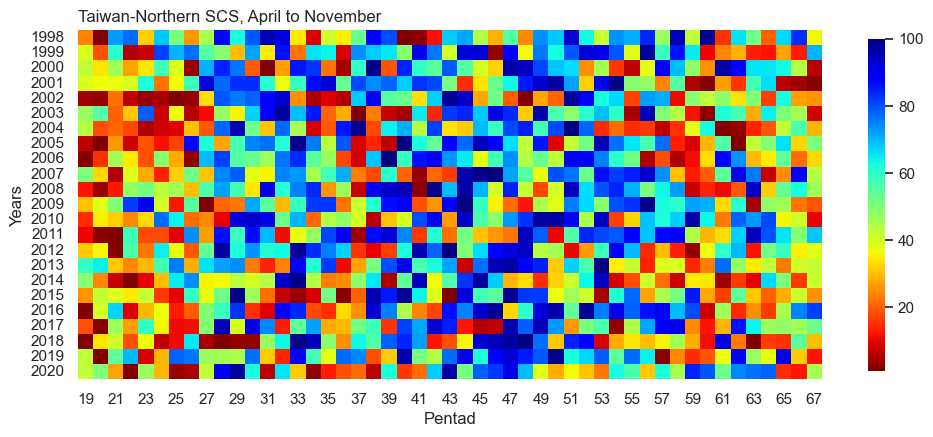

In [19]:
# Plot
fig, ax = plt.subplots(figsize=(12,8))
sns.set_theme()
ax = sns.heatmap(pcp_rank_da.to_pandas(),
                 cmap='jet_r',
                 square=True,
                 vmin=1,vmax=100,
                 cbar_kws={"shrink": 0.55, 'extend':'neither'},
                 xticklabels=2)
plt.xlabel("Pentad")
plt.ylabel("Years")
ax.set_title("Taiwan-Northern SCS, April to November",loc='left')
plt.savefig("pcp_pr_heatmap_obs_chn.png",orientation='portrait',dpi=300)

## 將`xarray.DataArray`轉換至`pandas.DataFrame`

### 利用`xarray.to_pandas`

根據[API reference](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.to_pandas.html)的說明，轉換後的格式和給定DataArray的維度有關。
> Convert this array into a pandas object with the same shape.
The type of the returned object depends on the number of DataArray dimensions:  
0D -> `xarray.DataArray`  
1D -> `pandas.Series`  
2D -> `pandas.DataFrame`  
Only works for arrays with 2 or fewer dimensions.



In [20]:
pcp_rank_df = pcp_rank_da.to_pandas()
pcp_rank_df

pentad,19,20,21,22,23,24,25,26,27,28,...,58,59,60,61,62,63,64,65,66,67
year,,,,,,,,,,,,,,,,,,,,,
1998,23.775510,0.714286,72.244898,77.040816,31.734694,68.163265,50.612245,25.918367,45.102041,86.938776,...,95.102041,42.755102,98.265306,15.204082,65.714286,51.836735,20.204082,66.428571,83.265306,35.816327
1999,39.285714,18.265306,60.204082,5.102041,7.551020,81.122449,70.102041,76.428571,55.204082,49.081633,...,85.816327,64.591837,10.408163,23.979592,28.571429,13.163265,11.938776,27.142857,12.755102,69.897959
2000,42.551020,34.183673,45.612245,26.938776,33.979592,57.755102,38.571429,3.673469,70.408163,84.183673,...,69.387755,48.163265,25.306122,96.632653,88.571429,65.408163,65.000000,63.163265,43.877551,6.020408
2001,39.081633,36.632653,37.244898,39.591837,61.530612,22.142857,36.530612,57.959184,92.244898,77.551020,...,55.510204,5.612245,1.632653,26.530612,15.510204,56.938776,66.326531,6.224490,3.775510,1.836735
2002,3.877551,3.163265,21.530612,6.326531,3.571429,4.387755,0.102041,3.061224,33.367347,79.387755,...,10.918367,48.673469,42.653061,48.367347,33.571429,49.795918,16.734694,62.653061,26.734694,25.612245
2003,47.142857,55.714286,20.102041,30.918367,78.367347,7.448980,36.938776,5.816327,11.122449,47.040816,...,44.081633,11.530612,2.448980,61.428571,56.734694,27.857143,64.183673,50.204082,45.510204,8.061224
2004,43.673469,18.061224,20.816327,17.448980,5.306122,8.265306,9.387755,30.102041,19.183673,77.857143,...,15.306122,37.755102,62.551020,1.530612,2.755102,13.469388,18.877551,42.448980,56.428571,28.775510
2005,6.734694,1.224490,26.122449,7.755102,18.469388,11.632653,17.142857,87.040816,61.632653,27.551020,...,13.367347,9.081633,28.979592,55.612245,0.918367,42.142857,49.387755,65.612245,32.346939,50.306122
2006,2.040816,15.000000,45.816327,34.387755,18.775510,48.571429,27.959184,2.653061,69.285714,81.326531,...,5.204082,11.224490,33.469388,87.244898,72.959184,29.285714,35.000000,53.775510,21.428571,32.448980


### Wide/Long form互相轉換：

利用`pandas.DataFrame.unstack`：


In [21]:
pcp_rank_long = pcp_rank_df.unstack().reset_index(name='PR')
pcp_rank_long

,pentad,year,PR
0,19,1998,23.775510
1,19,1999,39.285714
2,19,2000,42.551020
3,19,2001,39.081633
4,19,2002,3.877551
...,...,...,...
1122,67,2016,81.632653
1123,67,2017,52.653061
1124,67,2018,30.000000
1125,67,2019,11.938776
